In [1]:
# Steps to follow:  - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

In [2]:
# Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of 
# analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and 
# provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the 
# etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for 
# different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder

# PART 1

In [3]:
# State the null hypothesis
# The 3 different power levels (160, 180, 200) the etching rate it is always the same.

In [4]:
# State the alternate hypothesis
# There some different variance in the etching rate between the 3 different power levels. 

In [5]:
# What is the significance level
# The significance level is set to 5%, represented as the sandard p-value of 0.05. The significance level means the probability of reject the null hypothesis 
# and accept that the effect is statistically significant. 

In [6]:
# What are the degrees of freedom of model, error terms, and total DoF
# Checking the excel file we can see:
- freedom of model: 2 is the degrees of freedom of the power, that means the variability due to the power.
- error terms: 12 is the unexplained random error. 
- total DoF: 14 is the total Degrees of Freedom, that means the total variation in the data from the mean.

# PART 2

In [7]:
import pandas as pd

In [8]:
data = pd.read_excel('anova_lab_data.xlsx', sheet_name='data_collected')
data.head()

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching Rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [10]:
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [11]:
data.columns = data.columns.str.replace(r"Etching Rate", "Etching_Rate")
data.columns = data.columns.str.replace(r"Power ", "Power")

In [12]:
import re
data = data.replace(' W','', regex=True)

In [13]:
data["Power"] = data["Power"].apply(pd.to_numeric)

In [14]:
data

,Power,Etching_Rate
0,160,5.43
1,180,6.24
2,200,8.79
3,160,5.71
4,180,6.71
5,200,9.20
6,160,6.22
7,180,5.98
8,200,7.90
9,160,6.01


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     int64  
 1   Etching_Rate  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


In [17]:
data['Power'].unique()

array([160, 180, 200], dtype=int64)

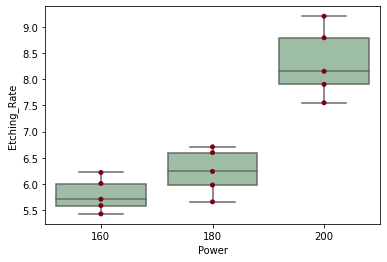

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Power', y='Etching_Rate', data=data, color='#99c2a2')
ax = sns.swarmplot(x="Power", y="Etching_Rate", data=data, color='#7d0013')
plt.show()
# generating a boxplot we can see the data distribution by Power:

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
model=ols('Etching_Rate ~ C(Power)', data=data).fit()

In [20]:
results_table=sm.stats.anova_lm(model)
results_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


In [25]:
# What conclusions can you draw from the experiment and why? 

# The conclusion is that there is statistical significance.
# There some evidence from this data cause 0.000008 is less than 0.05 (p-value). 
# This means that we reject the null hypothesis and we accept the alternative hypothesis.